# PyTorch Audio Autoencoder

In [ ]:
# Numbers
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from IPython.display import Image, Audio, HTML
import librosa.display

# Machine learning
import torch
import torchaudio.transforms as T
from sklearn.model_selection import train_test_split

# Audio
import torchaudio
import librosa

# Autoencoders
Encoder

$Z = f(X)$

$Z$ = Latent space

Decoder

$X = f^{-1}(Z)$

In [ ]:
sample_rate = 22050 # Hz
duration = 120 # seconds

# converts to mono, trims to <duration>, resamples to <sample_rate>, trims zeros
def format_audio(x, sr):
    x = torch.mean(x, dim=0) 
    x = x[:duration*sr]
    resampler = T.Resample(sr, sample_rate)
    x = resampler(x)
    x = np.trim_zeros(x.numpy())
    return torch.from_numpy(x)

## Short-Time Fourier Transform (STFT)
<img src="https://www.researchgate.net/publication/346243843/figure/fig1/AS:961807523000322@1606324191138/Short-time-Fourier-transform-STFT-overview.png" width="500px"/>

In [ ]:
Sclip = -60
hop_length_ms = 20
hop_length = int(sample_rate * hop_length_ms / 1000)
win_length = 4 * hop_length

X = []
y = []
phases = []

# Eventually get all the files in 'wavs' dir
x, sr = torchaudio.load("wavs/audio.wav")
x = format_audio(x, sr)
F = torch.stft(x, n_fft=win_length, hop_length=hop_length, win_length=win_length, window=torch.hann_window(win_length), return_complex=True).T
phases.append(torch.angle(F))
S = 10 * torch.log10(torch.abs(F)**2)
S = torch.clip(S, Sclip) - Sclip
X.append(S)
y.append(np.ones(S.shape[0])*0)

phases = torch.vstack(phases)
X = torch.vstack(X)
X_max = torch.max(X)
X = X / X_max
y = np.hstack(y)

In [ ]:
print('Win length:', win_length,', Hop length:', hop_length)
print('Data shape:', X.shape)
print('Length min:', X.shape[0]*hop_length_ms/1000/60)
n_features = X.shape[1]

Win length: 1764 , Hop length: 441
Data shape: torch.Size([5720, 883])
Length min: 1.9066666666666667


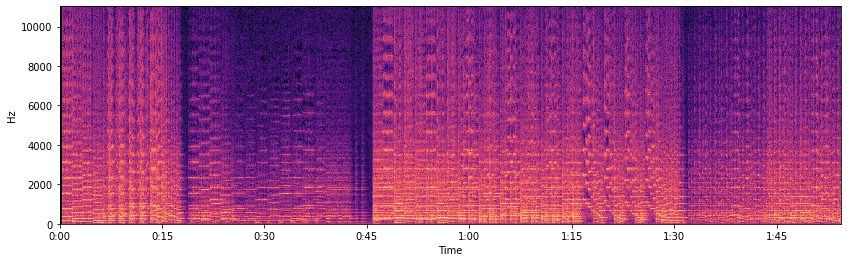

In [ ]:
plt.figure(figsize=(14, 4))
librosa.display.specshow(X.numpy().T, y_axis='linear', x_axis='time', hop_length=hop_length);

In [ ]:
X_ = torch.sqrt(10**((X * X_max + Sclip) / 10)) * torch.exp(1j * phases)
x_ = torch.istft(X_.T, n_fft=win_length, hop_length=hop_length, win_length=win_length, window=torch.hann_window(win_length), length=x.shape[0])
plt.plot(x_.numpy())
display("Original phase:", Audio(x_.numpy(), rate=sample_rate))

phases_ = np.random.rand(*X.shape)*2*np.pi
X_ = torch.sqrt(10**((X * X_max + Sclip) / 10)) * torch.exp(1j * torch.from_numpy(phases_))
x_ = torch.istft(X_.T, n_fft=win_length, hop_length=hop_length, win_length=win_length, window=torch.hann_window(win_length), length=x.shape[0])
display("Random phase:", Audio(x_.numpy(), rate=sample_rate))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,  test_size=0.05, shuffle=True)
print('Length mins:', X_train.shape[0]*hop_length_ms/1000/60)

Length mins: 1.8113333333333335
